Text(0.5, 0, 'X')

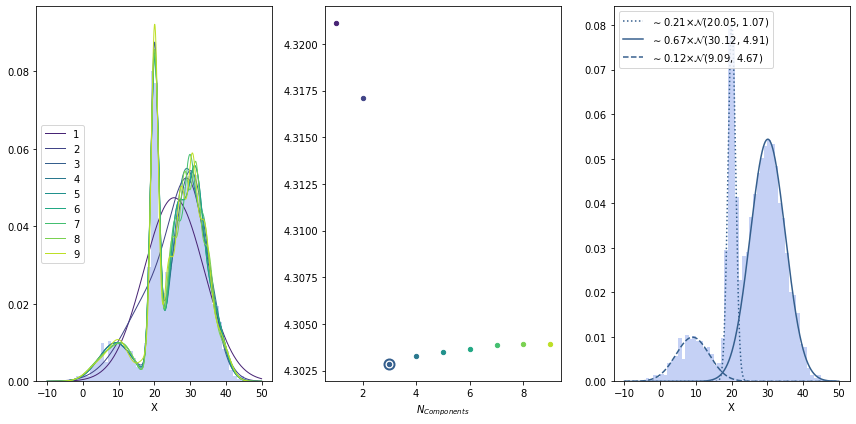

In [77]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

infile = '../solutions/formationchannels.npy'
data = np.load(infile)

from sklearn.mixture import GaussianMixture as GM
import seaborn as sns

fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(12,6))
myBins= np.arange(-10, 50, 1)
axs[0].hist(data.T[0], bins=myBins, density=True, alpha=0.3, facecolor='royalblue')
colors = sns.color_palette('viridis', n_colors=9)[:]
for N in range(1, 10, 1):
    model = GM(n_components = N)
    model.fit(data)
    means  = np.array( model.means_ ).T[0]
    sigmas = np.array( np.sqrt( model.covariances_ ) ).T[0][0]
    weights= np.array( model.weights_ ).T#[::-1]
    
    # print(means, sigmas, weights, sep='\n')
    
    from scipy.stats import norm
    x = np.linspace(-10, 50, 1000)
    f = np.sum( [norm(mu, rms).pdf(x) * weight for mu, rms, weight in zip(means, sigmas, weights) ], axis=0 )
    #for mu, rms, weight in zip(means, sigmas, weights):
    #    plt.plot(x, norm(mu, rms).pdf(x)*weight)
    axs[0].plot(x, f, label=str(N), c=colors[N-1], lw=1)
    axs[0].legend(loc='center left', ncol=1)

    axs[1].scatter(N, np.log10( model.aic(data) ), s=75, marker='.', color=colors[N-1])

    if N == 3: 
        axs[1].scatter(N, np.log10( model.aic(data) ), s=100, marker='o', 
                       facecolor=(0,0,0,0), edgecolor=colors[N-1], lw=2)
        axs[2].hist(data.T[0], bins=myBins, density=True, alpha=0.3, facecolor='royalblue')
        #axs[2].plot(x, f, c=colors[N-1])
        for mu, rms, weight, ls in zip(means, sigmas, weights, [':', '-', '--']):
            axs[2].plot(x, norm(mu, rms).pdf(x)*weight, ls=ls, c=colors[N-1],
                        label='$\sim$'+'{0:.2f}'.format(weight) + r'$\times \mathcal{N}$'+'({0:.2f}, {1:.2f})'.format(mu, rms))
        axs[2].legend(loc='upper left')

axs[0].set_xlabel('X')
axs[1].set_xlabel(r'$N_{Components}$')
axs[2].set_xlabel('X')